In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline  

In [2]:
df=pd.read_csv('stations.csv')



In [3]:
df['address']=df.name.apply(lambda x: 'scrape/out/'+str(x)+'_may.csv')
df['TemperatureAvgF']=[0]*len(df)
df['TemperatureHighF']=[0]*len(df)
df['TemperatureLowF']=[0]*len(df)
df['TemperatureAvgF1']=[0]*len(df)
df['TemperatureHighF1']=[0]*len(df)
df['TemperatureLowF1']=[0]*len(df)

In [5]:
address=df.address[1]
df_single=pd.read_csv(address)
df_single=df_single.dropna()

In [6]:
df_single.TemperatureAvgF[-1:]

56    82.2
Name: TemperatureAvgF, dtype: float64

In [7]:
df=df[0:245]
for index, row in df.iterrows():
    address=row['address']
    print address
    df_single=pd.read_csv(address)
    df_single=df_single.dropna()
    df.set_value(index,'TemperatureAvgF',df_single.TemperatureAvgF[-1:])
    df.set_value(index,'TemperatureHighF',df_single.TemperatureHighF[-1:])
    df.set_value(index,'TemperatureLowF',df_single.TemperatureLowF[-1:])
    df.set_value(index,'TemperatureAvgF1',df_single.TemperatureAvgF[:1])
    df.set_value(index,'TemperatureHighF1',df_single.TemperatureHighF[:1])
    df.set_value(index,'TemperatureLowF1',df_single.TemperatureLowF[:1])


    

scrape/out/KNYBRONX22_may.csv
scrape/out/KNYBRONX23_may.csv
scrape/out/KNYBRONX31_may.csv
scrape/out/KNYBRONX33_may.csv
scrape/out/KNYBRONX14_may.csv
scrape/out/KNYBROOK41_may.csv
scrape/out/KNYBROOK40_may.csv
scrape/out/KNYBROOK54_may.csv
scrape/out/KNYBROOK49_may.csv
scrape/out/KNYBROOK51_may.csv
scrape/out/KNYBROOK101_may.csv
scrape/out/KNYBROOK103_may.csv
scrape/out/KNYBROOK106_may.csv
scrape/out/KNYBROOK109_may.csv
scrape/out/KNYBROOK115_may.csv
scrape/out/KNYBROOK121_may.csv
scrape/out/KNYBROOK132_may.csv
scrape/out/KNYBROOK134_may.csv
scrape/out/KNYBROOK136_may.csv
scrape/out/KNYBROOK138_may.csv
scrape/out/KNYBROOK140_may.csv
scrape/out/KNYBROOK142_may.csv
scrape/out/KNYBROOK146_may.csv
scrape/out/KNYBROOK152_may.csv
scrape/out/KNYBROOK154_may.csv
scrape/out/KNYBROOK156_may.csv
scrape/out/KNYBROOK160_may.csv
scrape/out/KNYBROOK164_may.csv
scrape/out/KNYBROOK166_may.csv
scrape/out/KNYBROOK170_may.csv
scrape/out/KNYBROOK172_may.csv
scrape/out/KNYBROOK174_may.csv
scrape/out/KNYBROO

IOError: File scrape/out/nan_may.csv does not exist

In [102]:
Man=pd.read_csv('ManhattanTree.csv')
Broo=pd.read_csv('BrooklynTree.csv')
Que=pd.read_csv('QueensTree.csv')

df_trees=Man.append(Broo)
df_trees=df_trees.append(Que)
df_trees=df_trees[df_trees.CROSSSTREE != 'not listed']
df_trees=df_trees.drop(df_trees.the_geom != 'NaN')
df_trees=df_trees.drop('OBJECTID',1)
df_trees=df_trees.drop('OBJECTID_1',1)


df_trees=df_trees.dropna()
df_trees.BOROUGH.value_counts()
df_trees['lon']=df_trees.the_geom.apply(lambda x: float(x.replace('POINT (','').replace(')','').split(' ')[0]))
df_trees['lat']=df_trees.the_geom.apply(lambda x: float(x.replace('POINT (','').replace(')','').split(' ')[1]))
df_trees=df_trees.drop_duplicates('lat')
len(df_trees)

183348

In [105]:
df['lat']=df.coordinates.apply(lambda x: float(x.split('>')[1].split(' ')[1]))
df['lon']=df.coordinates.apply(lambda x: float(x.split('>')[1].split(' ')[2]))
df['h']=df.coordinates.apply(lambda x: float(x.split('>')[2].split(' ')[1]))

df=df.dropna()
df['Temp_max']=df.temp.apply(lambda x: x.split(';')[0])
df['Temp_max']=df.Temp_max.apply(lambda x: float(x))
df = df[df.temp != '9999']
df['Temp_min']=df.temp.apply(lambda x: x.split(';')[1])
df['Temp_med']=df.temp.apply(lambda x: x.split(';')[2])
df['Temp_med']=df.Temp_med.apply(lambda x: float(x))
df['Temp_min']=df.Temp_min.apply(lambda x: float(x))




df=df[(df.lon < -73.8) &(df.lat < 40.82)]
 
df['Trees']=[-1]*len(df)
for index, row in df.iterrows():   
    sel = (df_trees.lat > (row['lat']-0.01))&(df_trees.lat < (row['lat']+0.01)) & (df_trees.lon > (row['lon']-0.01))&(df_trees.lon < (row['lon']+0.01))
   
    if sum(sel) > 0:
        a=df_trees[sel].apply(lambda x:(x.lat-row['lat'])**2 + (x.lon-row['lon'])**2 <= 0.001**2,axis=1).sum()
        df=df.set_value(index,'Trees',a)
    
    
    

higher, with trees 60.5063291139 79
        no trees 56.0833333333 24
lower, with trees 54.5925925926 27
       no trees 62.1034482759 29


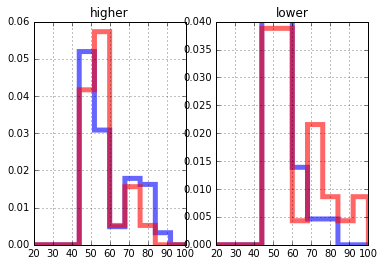

In [133]:

height=30
metric='TemperatureHighF1'
howmanytress=10


plt.subplot(1,2,1)
df[(df.Trees > -1 ) & (df.Trees > howmanytress) & (df.h > height)][metric].hist(range=[20,100], alpha=0.6, label='withtrees', normed=1, histtype='step', linewidth=5, color='blue')
df[(df.Trees > -1) & (df.Trees < howmanytress )& (df.h > height)][metric].hist(range=[20,100], alpha=0.6, label='notrees',normed=1, histtype='step', linewidth=5, color='red')
print  'higher, with trees',df[(df[metric] > 0) & (df.Trees > -1) & (df.Trees > howmanytress )& (df.h > height)][metric].mean(), len(df[(df[metric] > 0) &(df.Trees > -1) & (df.Trees > howmanytress )& (df.h > height)])
print  '        no trees', df[(df[metric] > 0) & (df.Trees > -1) & (df.Trees < howmanytress )& (df.h > height)][metric].mean(), len(df[(df[metric] > 0) & (df.Trees > -1) & (df.Trees < howmanytress )& (df.h > height)])
plt.title('higher')


# plt.legend()

plt.subplot(1,2,2)
df[(df.Trees > -1 ) & (df.Trees > howmanytress) & (df.h < height)][metric].hist(range=[20,100], alpha=0.6, label='withtrees', normed=1, histtype='step', linewidth=5, color='blue')
df[(df.Trees > -1) & (df.Trees < howmanytress )& (df.h < height)][metric].hist(range=[20,100], alpha=0.6, label='notrees',normed=1, histtype='step', linewidth=5, color='red')
print  'lower, with trees',df[(df[metric] > 0) &(df.Trees > -1) & (df.Trees > howmanytress )& (df.h < height)][metric].mean(), len(df[(df[metric] > 0) &(df.Trees > -1) & (df.Trees > howmanytress )& (df.h < height)])
print  '       no trees', df[(df[metric] > 0) & (df.Trees > -1) & (df.Trees < howmanytress )& (df.h < height)][metric].mean(), len(df[(df[metric] > 0) & (df.Trees > -1) & (df.Trees < howmanytress )& (df.h < height)])
plt.title('lower')

# plt.legend()

3


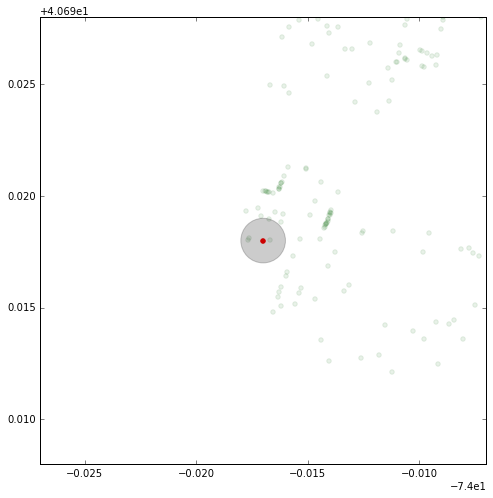

In [134]:
# fig,ax=plt.figure(figsize=(8,12))
plt.figure(figsize=(8,8))
ax=plt.subplot(aspect='equal')

index=169
plt.scatter(df_trees.lon, df_trees.lat, alpha=0.09, color='darkgreen')
plt.scatter(df.iloc[index].lon, df.iloc[index].lat, color='red')
plt.xlim([df.iloc[index].lon-0.01,df.iloc[index].lon+0.01])
plt.ylim([df.iloc[index].lat-0.01,df.iloc[index].lat+0.01])
circle1=plt.Circle((df.iloc[index].lon,df.iloc[index].lat),0.001,color='black',alpha=0.2)
plt.gcf().gca().add_artist(circle1)

print df.iloc[index].Trees

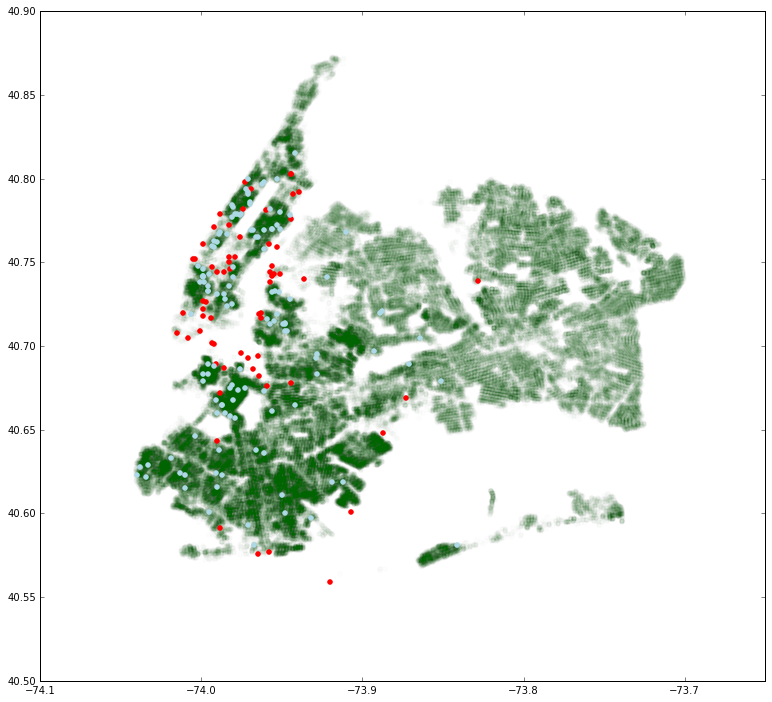

In [135]:
plt.figure(num=None, figsize=(13, 12), dpi=80, facecolor='w', edgecolor='k')



plt.scatter(df_trees.lon, df_trees.lat, alpha=0.01, color='darkgreen')


plt.scatter(df[(df.Trees > -1 ) & (df.Trees < howmanytress) & (df.h > -1)].lon,
    df[(df.Trees > -1 ) & (df.Trees < howmanytress) & (df.h > -1)].lat, color='red')
plt.scatter(df[(df.Trees > -1 ) & (df.Trees > howmanytress) & (df.h > -1)].lon,
    df[(df.Trees > -1 ) & (df.Trees > howmanytress) & (df.h > -1)].lat, color='lightblue')


# plt.scatter(df.iloc[28].lon,df.iloc[28].lat, color='red')

21147